In [101]:
#Begin with importing a variety of libraries 

# Pandas and Numpy are used for organizing and editing our dataframes 
import pandas as pd
import numpy as np

# Geopandas is a different version of pandas
# for geographical dataframes. 
import geopandas as gpd

# The following: matplotlib, seaborn, cufflinks, and plotly
# are all for plotting and visualizing data.
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
import plotly.figure_factory as ff

# This "inline" command ensures that our plots will show up 
# in Jupyter notebooks.
%matplotlib inline

In [102]:
# These two commands enable
# offlines use of Plotly and Cufflinks, which 
# typically use an online database. 

cf.go_offline()
init_notebook_mode(connected=True)

In [103]:
# For the purpose of displaying this notebook,
# we'll hide warnings.

import warnings
warnings.filterwarnings('ignore')

# Analysis – Correlations
We'll now move into our the data analysis portion of the project. 

This will include statistical correlations as well as exploration through visualization.

In [104]:
# Read in our data

county_data = pd.read_csv('county_data.csv')
uscountes = pd.read_csv('uscounties_data_shapefiles.csv')

In [105]:
# We'll look at statistically significant correlations: That is, the Spearman correlation with p-values.
# We'll use variables that represent demographic information and environmental justice factors. 

# First, import the stats package:

from scipy.stats.stats import spearmanr

In [106]:
uscounties.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'FIPS', 'State', 'County',
       'WhiteNonHispanicPct2010', 'BlackNonHispanicPct2010',
       'AsianNonHispanicPct2010', 'NativeAmericanNonHispanicPct2010',
       'HispanicPct2010', 'Ed1LessThanHSPct', 'Ed5CollegePlusPct',
       'UnempRate2017', 'PovertyAllAgesPct', 'PerCapitaInc', 'low_edu',
       'high_poverty', 'Violent Crime', 'mean water violations',
       '2010 Population', 'NO2 1-hr', 'SO2 1-hr', 'PM2.5 24-hr', 'cancer_rate',
       'Life Expectancy 2014', 'RSEI Score', 'Diversity-Index'],
      dtype='object')

In [107]:
# We'll split the the columns into two lists: 
# one that represents demographic information, 
# another that represents environmental factors

demo = ['WhiteNonHispanicPct2010', 'BlackNonHispanicPct2010',
       'AsianNonHispanicPct2010', 'NativeAmericanNonHispanicPct2010',
       'HispanicPct2010','Diversity-Index', 'Ed1LessThanHSPct', 'Ed5CollegePlusPct',
       'UnempRate2017', 'PovertyAllAgesPct', 'PerCapitaInc','Violent Crime','cancer_rate','Life Expectancy 2014','2010 Population']

env = ['mean water violations', 'NO2 1-hr', 'SO2 1-hr', 
       'PM2.5 24-hr','RSEI Score']

In [108]:
# create an empty DataFrame to store the data in

corr_data = {'variable_1':[],'variable_2':[],'spearman_correlation':[],'p-value':[]}
spearman = pd.DataFrame(data=corr_data)
spearman.reset_index()

Empty DataFrame
Columns: [index, variable_1, variable_2, spearman_correlation, p-value]
Index: []

In [109]:
# Create all empty cells

for i in range(len(env)*len(demo)):
    spearman.loc[i] = np.nan

In [110]:
# Iterate through all the variables and append the relevant information.

count = 0
for i in demo:
    for x in env:
        corr, p_value = spearmanr(uscounties[i],uscounties[x],nan_policy='omit')
        spearman['variable_1'][count] = i
        spearman['variable_2'][count] = x
        spearman['spearman_correlation'][count] = corr
        spearman['p-value'][count] = float(p_value)
        count += 1

In [111]:
# Take only statistically significant correlations (p<0.05)
spearman = spearman[spearman['p-value']<0.05]

# Sort by correlation
spearman = spearman.sort_values('spearman_correlation',ascending=False)

In [112]:
# Now we'll create a pivot table that displays the statistically significant correlations

spearman_matrix = spearman.pivot("variable_1",'variable_2','spearman_correlation').fillna('0').astype(float)

In [113]:
# Here's what we ended up with
# 0.000 values represent statistically insignifcant correlations

spearman_matrix

variable_2                        NO2 1-hr  PM2.5 24-hr  RSEI Score  SO2 1-hr  \
variable_1                                                                      
2010 Population                   0.716613     0.193791    0.574975 -0.198561   
AsianNonHispanicPct2010           0.610180     0.126645    0.467289 -0.253485   
BlackNonHispanicPct2010           0.423181    -0.085806    0.353982  0.000000   
Diversity-Index                   0.545936     0.210425    0.177121  0.000000   
Ed1LessThanHSPct                  0.228888     0.122960   -0.124880  0.000000   
Ed5CollegePlusPct                 0.355535     0.000000    0.231669 -0.303963   
HispanicPct2010                   0.439089     0.336913    0.107266 -0.138155   
Life Expectancy 2014              0.159420     0.000000    0.000000 -0.327442   
NativeAmericanNonHispanicPct2010 -0.175720     0.159476   -0.120195  0.000000   
PerCapitaInc                      0.171383     0.000000    0.192880 -0.214760   
PovertyAllAgesPct                 0.155597     0.000000   -0.132167  0.000000   
UnempRate2017                     0.000000     0.203156    0.000000  0.000000   
Violent Crime                     0.292527     0.249147    0.419460  0.000000   
WhiteNonHispanicPct2010          -0.565024    -0.238763   -0.114654  0.000000   
cancer_rate                       0.000000    -0.251200    0.203374  0.000000   

variable_2                        mean water violations  
variable_1                                               
2010 Population                                0.238660  
AsianNonHispanicPct2010                        0.118420  
BlackNonHispanicPct2010                        0.069803  
Diversity-Index                                0.130461  
Ed1LessThanHSPct                               0.000000  
Ed5CollegePlusPct                              0.102243  
HispanicPct2010                                0.164392  
Life Expectancy 2014                           0.091150  
NativeAmericanNonHispanicPct2010               0.000000  
PerCapitaInc                                   0.108579  
PovertyAllAgesPct                             -0.088961  
UnempRate2017                                 -0.110822  
Violent Crime                                  0.000000  
WhiteNonHispanicPct2010                       -0.103833  
cancer_rate                                    0.000000

In [114]:
# Export
spearman_matrix.to_csv('Spearman_Matrix.csv')

In [115]:
# For visualization purposes, we'll make a better looking correlation table with Plotly/Cufflinks.
# Plotly is a visualization package and cufflinks is an extension that allows for
# simplified interaction with Pandas DataFrames. It is quite powerful and we can create
# really interesting visualizations with just one line of code:

# First we'll create the cufflinks plot. 
spearman_matrix.iplot(asFigure=False,kind='heatmap',title='County-Level Spearman Correlations of Demographic and Environmental Variables',
                               margin=(150,120,150,100),colorscale="rdbu")


In [116]:
# Here's what the Plotly figure data looks like. 
# We'll be indexing this to change some variables.
figure = spearman_matrix.iplot(asFigure = True, kind='heatmap',title='Spearman Correlations of Demographic and Environmental Variables',
                               margin=(150,120,150,100),text='Spearman Correlation Coefficient',colorscale="rdbu")

figure

Figure({
    'data': [{'colorscale': [[0.0, 'rgb(103,0,31)'], [0.1, 'rgb(178,24,43)'],
                             [0.2, 'rgb(214,96,77)'], [0.3, 'rgb(244,165,130)'],
                             [0.4, 'rgb(253,219,199)'], [0.5, 'rgb(247,247,247)'],
                             [0.6, 'rgb(209,229,240)'], [0.7, 'rgb(146,197,222)'],
                             [0.8, 'rgb(67,147,195)'], [0.9, 'rgb(33,102,172)'],
                             [1.0, 'rgb(5,48,97)']],
              'type': 'heatmap',
              'uid': '6a969ff6-3a2c-484f-a330-21765910754e',
              'x': [2010 Population, AsianNonHispanicPct2010,
                    BlackNonHispanicPct2010, Diversity-Index, Ed1LessThanHSPct,
                    Ed5CollegePlusPct, HispanicPct2010, Life Expectancy 2014,
                    NativeAmericanNonHispanicPct2010, PerCapitaInc,
                    PovertyAllAgesPct, UnempRate2017, Violent Crime,
                    WhiteNonHispanicPct2010, cancer_rate],
              'y': [NO

In [117]:
# This first plot is great, but has a few things that could be changed.
# For more refined editing, we'll need to convert the cufflinks plot
# to a Plotly figure. Then, we'll be able to directly edit the features.

# Save as plotly figure by changing the boolean value of "asFigure"

figure = spearman_matrix.iplot(asFigure = True, kind='heatmap',title='Spearman Correlations of Demographic and Environmental Variables',
                               margin=(150,120,150,100),text='Spearman Correlation Coefficient',colorscale="rdbu")

# Edit the plot figure to make the background transparent to fit with our website
figure['layout'].update({'paper_bgcolor': 'rgba(0,0,0,0)',
               'plot_bgcolor': 'rgba(0,0,0,0)'})

# Edit colorscale so that 0 is centered (i.e. 0 is white instead of peach)
# The default setting makes it so that the highest/lowest values are the extreme
# ends of the colorscale, where's we'd prefer 0 and 1 to be the extremes. 

# We'll also edit the plot so there is a legend title 

for i, x in enumerate(figure['data']):
    x['colorbar'] = {'title': 'Spearman Correlation Coefficient', 'titleside': 'right',  'titlefont':{
      'size': 10}}
    x['colorscale'] = [[0.0, 'rgb(103,0,31)'],[0.45, 'rgba(255, 255, 255, 0.85)'],[1.0, 'rgb(5,48,97)']]

# .iplot() to plot the figure here, .plot() to save the plot locally
iplot(figure,show_link=False),
plot(figure,show_link=False,filename='SpearmanCorr_Heatmap.html')



'file:///Users/chasemcdonald/Desktop/BASC0005Project/TestProject/SpearmanCorr_Heatmap.html'

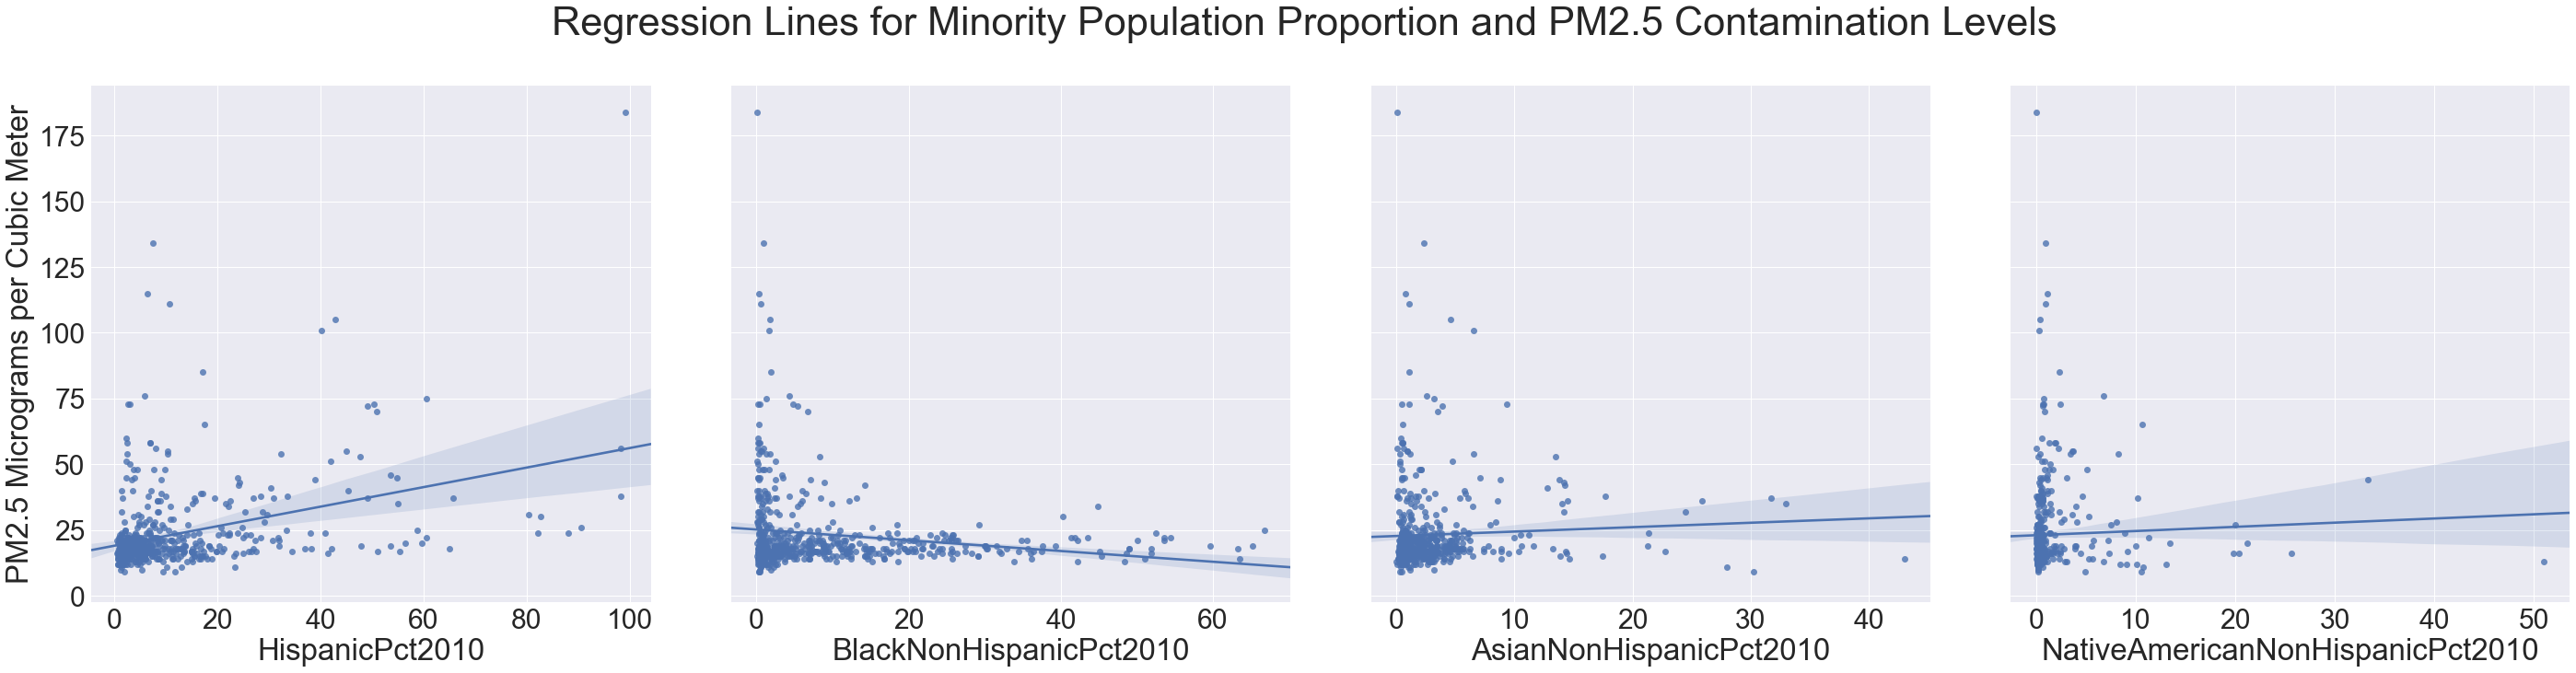

In [118]:
# Moving on, we'll also visualize some of these relationships independently. 

# For this, we'll use Seaborn. 

# Set font size
sns.set(font_scale=3)

# Create pairplot (with a renamed y-axis for unit clarity)

p = sns.pairplot(county_data.rename({'PM2.5 24-hr':'PM2.5 Micrograms per Cubic Meter'},axis=1),
                 y_vars='PM2.5 Micrograms per Cubic Meter',
                 x_vars=['HispanicPct2010','BlackNonHispanicPct2010',
                         'AsianNonHispanicPct2010','NativeAmericanNonHispanicPct2010'],
            kind='reg',
            size=10)

# Add title
p.fig.suptitle('Regression Lines for Minority Population Proportion and PM2.5 Contamination Levels',y=1.05)

# Save file

p.savefig("Reg_Minority_PM2.5.png")


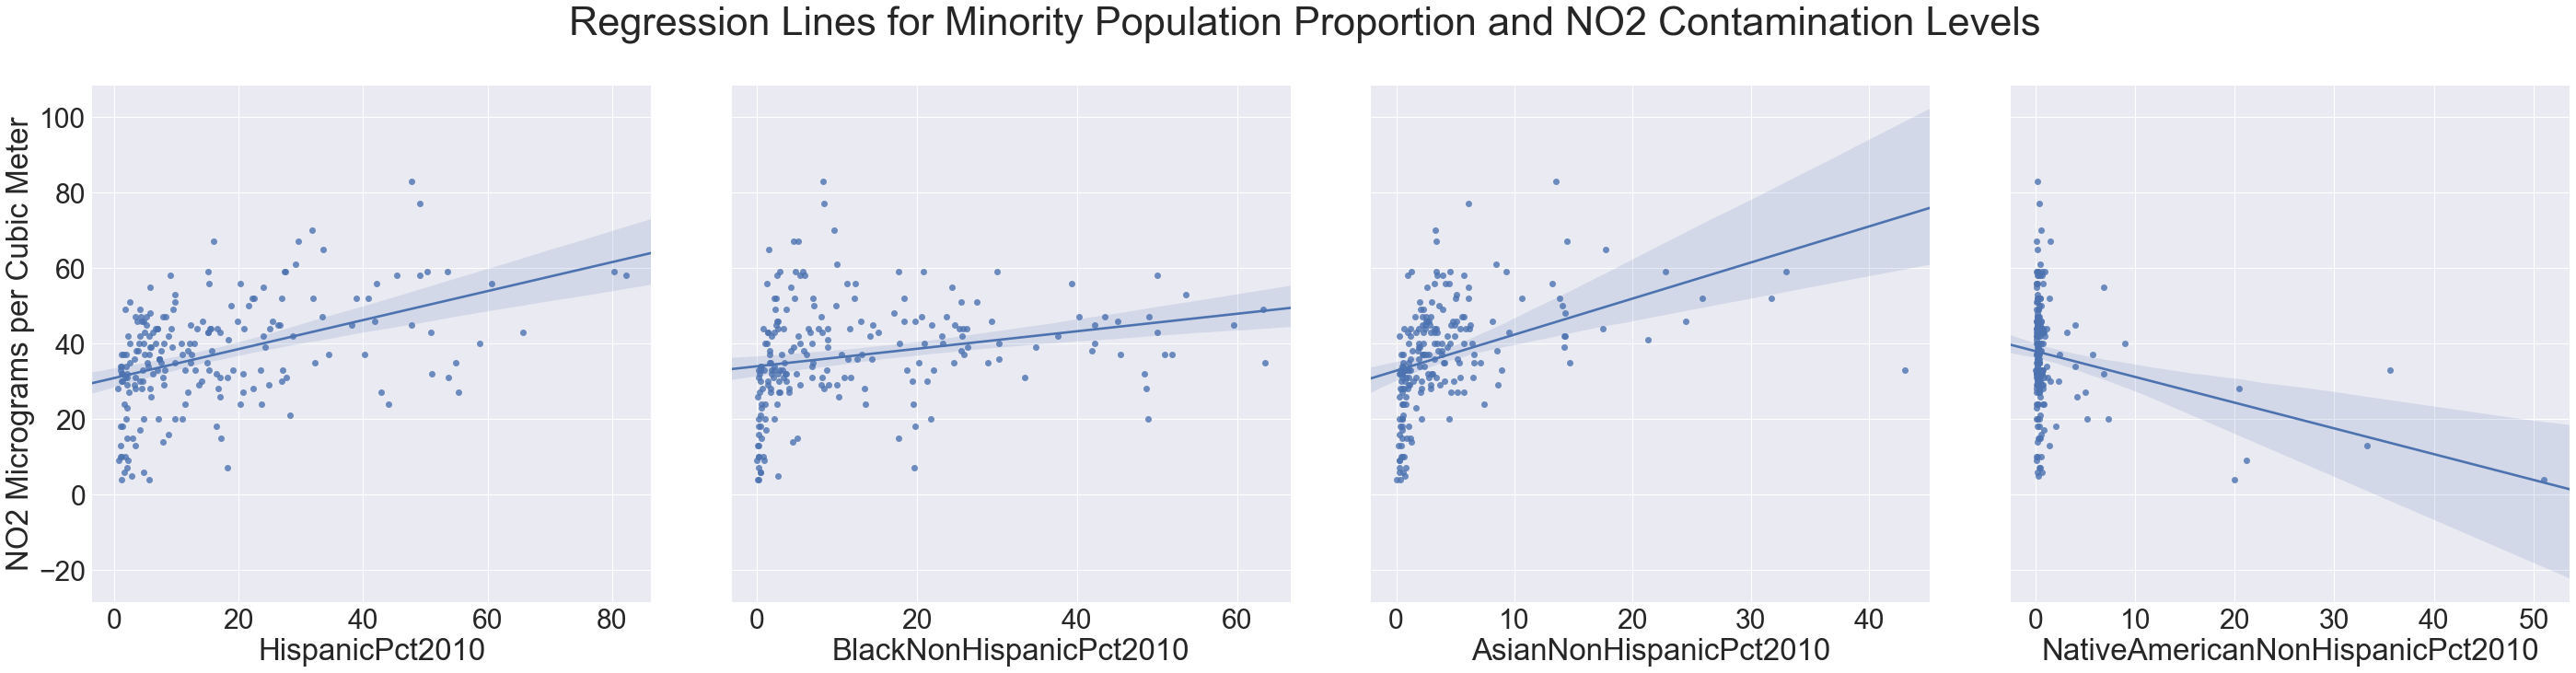

In [119]:
# We'll do this again for NO2 contamination

# Create pairplot (with a renamed y-axis for unit clarity)

q = sns.pairplot(county_data.rename({'NO2 1-hr':'NO2 Micrograms per Cubic Meter'},axis=1),
                 y_vars='NO2 Micrograms per Cubic Meter',
                 x_vars=['HispanicPct2010','BlackNonHispanicPct2010',
                         'AsianNonHispanicPct2010','NativeAmericanNonHispanicPct2010'],
            kind='reg',
            size=10)

# Add title
q.fig.suptitle('Regression Lines for Minority Population Proportion and NO2 Contamination Levels',y=1.05)

# Save file

q.savefig("Reg_Minority_NO2.png")


# Analysis - T-Testing
Next, we'll move into further statistical tests. We have two categorical variables that will make for simple T-Testing: 'low_edu' and 'high_poverty'. Unfortunately, we do not have a classification variable for high-minority communities, which would aid in that aspect of analysis.

What we'll do now is compare the average of high poverty and low education counties to see if their average rates of harmful environmental factors are statistically different from counties without those classifications. 

In [120]:
# Let's take another look at the DataFrame:
county_data.head(3)

Unnamed: 0  FIPS State   County  WhiteNonHispanicPct2010  \
0           0  1001    AL  Autauga                    77.25   
1           1  1003    AL  Baldwin                    83.50   
2           2  1005    AL  Barbour                    46.75   

   BlackNonHispanicPct2010  AsianNonHispanicPct2010  \
0                    17.58                     0.86   
1                     9.31                     0.74   
2                    46.69                     0.39   

   NativeAmericanNonHispanicPct2010  HispanicPct2010  Ed1LessThanHSPct  \
0                              0.40             2.40         12.417046   
1                              0.63             4.38          9.972418   
2                              0.22             5.05         26.235928   

        ...         Violent Crime  mean water violations  2010 Population  \
0       ...                  73.0                    NaN              NaN   
1       ...                 127.0                    NaN         182265.0   
2       ...                  32.0                    NaN              NaN   

   NO2 1-hr  SO2 1-hr  PM2.5 24-hr  cancer_rate  Life Expectancy 2014  \
0       NaN       NaN          NaN        488.1                 75.67   
1       NaN       NaN         19.0        441.1                 78.08   
2       NaN       NaN          NaN        430.6                 75.42   

      RSEI Score  Diversity-Index  
0   47842.603930         0.388898  
1  346841.409100         0.297942  
2     366.063944         0.556605  

[3 rows x 26 columns]

In [121]:
# and the two categorical variables: 'high_poverty' and 'low_edu'
county_data[['high_poverty','low_edu']].head()

high_poverty  low_edu
0           0.0      0.0
1           0.0      0.0
2           1.0      1.0
3           0.0      1.0
4           0.0      1.0

In [122]:
# We're going to compare the means of all the environmental data based on these two categorical variables. 
# We'll take the data for each:

hipov = county_data[county_data['high_poverty']==1.0]
npov = county_data[county_data['high_poverty']==0.0]

lowedu = county_data[county_data['low_edu']==1.0]
nedu = county_data[county_data['low_edu']==0.0]

In [123]:
# We'll also check more variables this time:

ttest_vars = ['Violent Crime','cancer_rate','Life Expectancy 2014',
              'mean water violations', 'NO2 1-hr', 'SO2 1-hr', 
              'PM2.5 24-hr','RSEI Score']

In [124]:
# next, we'll import the Scipy ttest function
from scipy.stats import ttest_ind

In [125]:
# We're going to append the results to a DataFrame for easy viewing
# So, we'll dataframe for our education tests and poverty tests.
# We'll start with poverty. 

ttest_data = {'var':[],'t-statistic':[],'p-value':[]}
ttest_pov = pd.DataFrame(data=ttest_data)
ttest_pov.reset_index()

Empty DataFrame
Columns: [index, var, t-statistic, p-value]
Index: []

In [126]:
# Create all empty cells

for i in range(len(ttest_vars)):
    ttest_pov.loc[i] = np.nan

In [127]:
ttest_pov

var  t-statistic  p-value
0  NaN          NaN      NaN
1  NaN          NaN      NaN
2  NaN          NaN      NaN
3  NaN          NaN      NaN
4  NaN          NaN      NaN
5  NaN          NaN      NaN
6  NaN          NaN      NaN
7  NaN          NaN      NaN

In [128]:
# We'll run the T-Test to test the means of counties that are 
# classified as high poverty and those without that classification
# for each of our "environmental" variables.

count = 0
for i in ttest_vars:
    tstat, p_value = ttest_ind(hipov[i],npov[i],nan_policy='omit')
    ttest_pov['var'][count] = i
    ttest_pov['t-statistic'][count] = tstat
    ttest_pov['p-value'][count] = float(p_value)
    count += 1

In [129]:
# Here are our results:

ttest_pov

var  t-statistic        p-value
0          Violent Crime    -1.540302   1.236118e-01
1            cancer_rate     0.446556   6.552289e-01
2   Life Expectancy 2014   -34.696532  1.405792e-223
3  mean water violations     0.475012   6.348743e-01
4               NO2 1-hr     1.998947   4.692847e-02
5               SO2 1-hr     0.289468   7.724285e-01
6            PM2.5 24-hr     2.449483   1.461640e-02
7             RSEI Score    -1.095565   2.733511e-01

In [130]:
# Statistically significant results:

ttest_pov[ttest_pov['p-value']<0.05]

var  t-statistic        p-value
2  Life Expectancy 2014   -34.696532  1.405792e-223
4              NO2 1-hr     1.998947   4.692847e-02
6           PM2.5 24-hr     2.449483   1.461640e-02

In [131]:
# We'll make another DataFrame for our education test.

ttest_data = {'var':[],'t-statistic':[],'p-value':[]}
ttest_edu = pd.DataFrame(data=ttest_data)
ttest_edu.reset_index()

# Create all empty cells

for i in range(len(ttest_vars)):
    ttest_edu.loc[i] = np.nan

# Again, we'll run the T-Test to test the means of counties that are 
# classified as low education and those without that classification
# for each of our "environmental" variables.

count = 0
for i in ttest_vars:
    tstat, p_value = ttest_ind(lowedu[i],nedu[i],nan_policy='omit')
    ttest_edu['var'][count] = i
    ttest_edu['t-statistic'][count] = tstat
    ttest_edu['p-value'][count] = float(p_value)
    count += 1

In [132]:
# Here are our results:

ttest_edu

var  t-statistic       p-value
0          Violent Crime     1.597137  1.103600e-01
1            cancer_rate    -2.555021  1.066834e-02
2   Life Expectancy 2014   -20.866145  1.175714e-90
3  mean water violations     3.792461  1.574586e-04
4               NO2 1-hr     3.682201  2.953907e-04
5               SO2 1-hr     0.229601  8.185629e-01
6            PM2.5 24-hr     5.154700  3.552589e-07
7             RSEI Score     0.360365  7.185983e-01

In [133]:
# Statistically significant results

ttest_edu[ttest_edu['p-value']<0.05]

var  t-statistic       p-value
1            cancer_rate    -2.555021  1.066834e-02
2   Life Expectancy 2014   -20.866145  1.175714e-90
3  mean water violations     3.792461  1.574586e-04
4               NO2 1-hr     3.682201  2.953907e-04
6            PM2.5 24-hr     5.154700  3.552589e-07

In [134]:
# Now, we'll visualize the statistically significant results
# For high poverty, our statistically significant results
# relate to NO2 and PM2.5 contamination. 

trace0 = go.Bar(
    x=['NO2 1-hr','PM2.5 24-hr'],
    y=[hipov['NO2 1-hr'].mean(),hipov['PM2.5 24-hr'].mean()],
    name='High Poverty Counties',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=['NO2 1-hr','PM2.5 24-hr'],
    y=[npov['NO2 1-hr'].mean(),npov['PM2.5 24-hr'].mean()],
    name='Unclassified Counties',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45,title='Contaminant'),
    yaxis=dict(title='Micrograms per Cubic Meter'),
    barmode='group',
    title='Average NO2 and PM2.5 Air Contamination for High Poverty vs. Unclassified Counties (2017)'
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

In [135]:
# Next, we'll visualize the statistically significant results
# for low education.

trace2 = go.Bar(
    x=['NO2 1-hr','PM2.5 24-hr'],
    y=[lowedu['NO2 1-hr'].mean(),lowedu['PM2.5 24-hr'].mean()],
    name='Low Education Counties',
    marker=dict(
        color='rgb(79,230,189)'
    )
)
trace3 = go.Bar(
    x=['NO2 1-hr','PM2.5 24-hr'],
    y=[nedu['NO2 1-hr'].mean(),nedu['PM2.5 24-hr'].mean()],
    name='Unclassified Counties',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace2, trace3]
layout = go.Layout(
    xaxis=dict(tickangle=-45,title='Contaminant'),
    yaxis=dict(title='Micrograms per Cubic Meter'),
    barmode='group',
    title='NO2 and PM2.5 Air Contamination for Low Education vs. Unclassified Counties (2017)'
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

In [136]:
# Next up is water drinking violations. 

trace4 = go.Bar(
    x=[''],
    y=[lowedu['mean water violations'].mean()],
    name='Low Education Counties',
    marker=dict(
        color='rgb(29,230,589)'
    )
)
trace5 = go.Bar(
    x=[''],
    y=[nedu['mean water violations'].mean()],
    name='Unclassified Counties',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace4, trace5]
layout = go.Layout(
    xaxis=dict(tickangle=-45,title='Drinking Water Standard Violations'),
    yaxis=dict(title='Number of Violations'),
    barmode='group',
    title='Average Water Violations for Low Education vs. Unclassified Counties (1994-2016)'
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

In [137]:
# Next up is life expectancy. 

trace6 = go.Bar(
    x=[''],
    y=[lowedu['Life Expectancy 2014'].mean()],
    name='Low Education Counties',
    marker=dict(
        color='rgb(29,230,589)'
    )
)
trace7 = go.Bar(
    x=[''],
    y=[nedu['Life Expectancy 2014'].mean()],
    name='Unclassified Education Counties',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

trace8 = go.Bar(
    x=[''],
    y=[hipov['Life Expectancy 2014'].mean()],
    name='High Poverty Counties',
    marker=dict(
        color='rgb(22,164,569)',
    )
)

trace9 = go.Bar(
    x=[''],
    y=[npov['Life Expectancy 2014'].mean()],
    name='Unclassified Poverty Counties',
    marker=dict(
        color='rgb(204,204,184)',
    )
)

data = [trace6, trace7, trace8, trace9]
layout = go.Layout(
    xaxis=dict(tickangle=-45,title=''),
    yaxis=dict(title='Life Expectancy (years)',range=[70,80]),
    barmode='group',
    title='Life Expectancy for Low Education and High Poverty vs. Unclassified Counties (2014)'
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

In [138]:
# Next up is life expectancy. 
# We'll plot both high poverty and low education together.

trace6 = go.Bar(
    x=[''],
    y=[lowedu['cancer_rate'].mean()],
    name='Low Education Counties',
    marker=dict(
        color='rgb(29,230,589)'
    )
)
trace7 = go.Bar(
    x=[''],
    y=[nedu['cancer_rate'].mean()],
    name='Unclassified Education Counties',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

trace8 = go.Bar(
    x=[''],
    y=[hipov['cancer_rate'].mean()],
    name='High Poverty Counties',
    marker=dict(
        color='rgb(22,164,569)',
    )
)

trace9 = go.Bar(
    x=[''],
    y=[npov['cancer_rate'].mean()],
    name='Unclassified Poverty Counties',
    marker=dict(
        color='rgb(96,96,96)',
    )
)

data = [trace6, trace7, trace8, trace9]
layout = go.Layout(
    xaxis=dict(tickangle=-45,title=''),
    yaxis=dict(title='Average Cancer Diagnoses per 100,000',range=[440,450]),
    barmode='group',
    title=' Average Cancer Diagnosis Rates for Low Education and High Poverty vs. Unclassified Counties (1994-2014)'
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)